<img src="images/cs5228-header-title.png" />

# Assignment 1 - Exploratory Data Analysis (EDA) & K-Means

Hello everyone, this assignment notebook covers Exploratory Data Analysis (EDA) and K-Means. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A1_YourName_YourNUSNETID.ipynb** (e.g., **A1_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A1_YourName_YourNUSNETID.py** (e.g., **A1_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Sep 12, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0286188L'
nusnet_id = 'E1237250'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well documented, but you can use the overview below to double-check that you covered everything.

* **1 Data Cleaning & Exploratory Data Analysis (EDA) (30 Points)**
    * 1.1 Preparing a Real-World Dataset for Analysis (22 Points)
        * 1.1 a) Removing "Dirty" Records (6 Points)
        * 1.1 b) Handling Missing (NaN) Values (6 Points)
        * 1.1 c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
        * 1.1 d) Handling of Categorical Attributes (4 Points)
    * 1.2 Basic Facts about a Real-World Dataset (8 Points)
* **2 K-Means (18 Points)**
    * 2.1 Implementing K-Means++ (12 Points)
        * 2.1 a) Initializing Centroids Based on K-Means++ (5 Points)
        * 2.1 b) Assigning Data Points to Clusters (4 Points)
        * 2.1 c) Updating the Centroids (3 Points)
    * 2.2 Questions about K-Means (8 Points)
        * 2.2 a) Understanging K-Means++ Initialization (6 Points)
        * 2.2 b) K-Means with Different Distance/Similarity metrics (2 Points)

## Setting up the Notebook

In [2]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

Making all the required imports:

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from src.utils import *

np.set_printoptions(precision=3)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A1.py`, you also need to edit the import statement below accordingly.

In [4]:
from A1_VishwanathDattatreyaDoddamani_e1237250 import clean, handle_nan, extract_facts, MyKMeans
#from A1_BobSmith_e12345678 import lean, handle_nan, extract_facts, MyKMeans # <-- you well need to rename this accordingly

----------------

# 1 Data Cleaning & Explorative Data Analysis (EDA)

### 1.1 Preparing a Real-World Dataset for Analysis (22 Points)

For the following tasks, we consider a dataset containing information for 20,000 past resale transactions of condo flats. Each record (i.e., data samples) consists of 12 attributes. The following **data description** list all attributes together with a brief description of each attribute's data type / domain:

* **transaction_id**: Unique ID of the resale transactions; an 8-digit integer number uniquely assigned to each transaction.
* **url**: Unique link to a website documenting this transaction as a string value.
* **name**: The name of the condo as a string value (e.g., "estella gardens", "eedon green").
* **type**: The type of condo as a string value (e.g., "condominium", "apartment").
* **postal_district**: The postal district the condo is located in as an integer value; Singapore has 28 postal districts: 1, 2, ..., 28 (cf. [here](https://www.propertygiant.com/resource/singapore-postal-districts-map)).
* **subzone**: The subzone the condo is located in as a string value.
* **planning_area**: The planning area the condo is located in as a string value.
* **date_of_sale**: The date (month & year) of the transaction as a string value (e.g., "mar-19", "oct-20").
* **area_sqft**: The size of the condo flat in square feet as a positive integer value.
* **floor_level**: The range of floors in which the flat is located in the condo as a string value (e.g., "06 to 10", "11 to 15").
* **eco_category**: The eco category of the condo as a single-character string value (e.g., "A", "B", "C", "D").
* **price**: Resale price of the condo flat in Singapore Dollar as an integer value.

Additional information: Singapore has 55 panning areas; each planning area is further split into multiple subzones (if you are interested, you can check out the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/List_of_places_in_Singapore)).

**Important:** In each of the following subtask 1.1 a)-c) we use a slightly different version of the dataset. This allows you to focus on the specific aspects of data cleaning / data preprocessing addressed in the respective subtask. In practice, of course, there would be only one dataset containing all the different issues (e.g., "dirty" records, missing data, etc.) at once.

#### 1.1 a) Removing "Dirty" Records (6 Points)

We argued in the lecture that almost all real-world datasets contain some form of noise that might negatively affect any applied data analysis. The very first -- and in some sense -- easiest way to identify noise is to check if all data confirms with the data description. The following code cell shows a snippet of the dataset which you will be looking at in this subtask.

In [5]:
df_condos_dirty = pd.read_csv('data/a1-condo-resale-dirty.csv')

df_condos_dirty.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,82953057,https://condo-sg.com/treasure-at-tampines-5009,treasure at tampines,condominium,18,tampines east,tampines,jul-19,818,06 to 10,A,1024000
1,17139360,https://condo-sg.com/parc-central-residences-4954,parc central residences,executive condominium,18,tampines west,tampines,apr-21,990,11 to 15,A,1187000
2,22288515,NaN,martina mansions,apartment,10,nassim,tanglin,jan-20,1259,01 to 05,A,2300000
3,80737365,https://condo-sg.com/the-pier-at-robertson-1701,the pier at robertson,apartment,9,robertson quay,singapore river,jun-19,1044,06 to 10,A,2400000
4,83154310,https://condo-sg.com/rivercove-residences-1525,rivercove residences,executive condominium,19,anchorvale,sengkang,oct-18,1184,16 to 20,A,1239100


If you check the dataset against its description as given above -- with the help of `pandas` or by simply inspecting the raw data file -- you will notice that many records are "dirty", meaning they are not in the expected format. Dirty records can negatively affect any subsequent analysis it needs.

**Perform EDA on the Condo dataset and perform appropriate preprocessing steps to clean the data!** The preprocessing step for cleaning the data step may include
* the *removal* of "dirty" records or
* the *modification* of "dirty" records records

**Task 1: Identify at least 3 issues** with the dataset that would negatively affect any subsequent analysis due to "dirty" records, and clean the data accordingly.

**Important:**

* Recall from the lecture that data cleaning often involves making certain decisions. As such, you might come up with different steps than other students. This is OK as long as you can reasonably justify your steps.
* The goal is to preserve as much of the records as possible! So only remove records as part of your data cleaning if it's really necessary (this includes that you should not remove any attributes!). There might be different valid cases, so don't forget to briefly justify your decision.
* For this task, we are **not** trying to identify "noise" (e.g., outliers in the form of suspicious values) or `NaN` values; this will be covered later. Here, we look for records with values not eligible to be used for an analysis because they do not adhere to the data description!

Please provide your answer below. It should list the different issues you have identified and briefly discuss which data cleaning steps you can and/or need to perform to address those issues.

**Your answer:**

<p>1) Column <b>'transaction_id'</b> has dirty values. Instead of 8 digit integer, some rows have 75813186X, 61175404X, 11843722X (618 rows have values that are not integers). After carefully going through these values, it can be observed that all these have length 9 and hence it can be assumed that'X' is appended to these values because of some formatting issue, data entry issue, etc. </p><b>Solution: </b>To solve this, we first replace 'X' with empty string '' and then type cast the entire column to integer.<br>

<p>2) Column <b>'postal_district'</b> contains dirty values. Based on the data description, it should have values in the range of 1 to 28. However, there are 979 rows where the value is 0. This issue can be solved using 'subzone' value.</p><b>Solution: </b>A dictionary is created with subzone as the key and postal_district as the value using rows that have postal_district value from 1 to 28. Then, for postal_district with 0 value, 0 is substituted with the value in the dictionary. One concern that might occur is if the subzone value is unique to the row, then the value is not replaced and these rows are dropped. However, this is not the case in the given dataset and hence no rows are lost.</p>

<p>3) Column <b>'area_sqft'</b> has dirty values. The size of the condo should be positive. However, there are 1037 rows where the value is less than 0.</p><b>Solution: </b>To solve this, the data is grouped by the 'type' and then dirty values are replaced with the median of the group type. Median is used to mitigate outlier issue. The data is grouped by 'type' because the apartment, condominium, etc., usually sell for different prices even if the size of the estate is equal.</p>

<p>4) <b>Duplicates need to be dropped</b> as they act as redundant and do not adhere to the description.</p>

**Task 2: Complete the method `clean` in the `.py` file to actually implement your steps for handling "dirty records"!** The results should back up your answer above. *Hint:* Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [6]:
df_condos_cleaned = clean(df_condos_dirty)

print('After preprocessing, there are now {} records.'.format(df_condos_cleaned.shape[0]))

After preprocessing, there are now 19983 records.


**Important:** We do not provide an expected output regarding the number of records after the cleaning step as there is some wiggle room regarding the performed steps which would affect this result. As such, even if two solutions are correct, they do not necessarily yield the same number of records.

#### 1.1 b) Handling Missing (NaN) Values (6 Points)

Many traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our condos resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [7]:
df_condos_nan = pd.read_csv('data/a1-condo-resale-nan.csv')

df_condos_nan.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,95103981,http://condo-sg.com/alex-residences-3570,alex residences,apartment,3,redhill,bukit merah,oct-21,883,01 to 05,A,1595880.0
1,69374014,http://condo-sg.com/the-rivervale-4160,the rivervale,executive condominium,19,rivervale,sengkang,jul-17,1313,06 to 10,A,900000.0
2,54377409,http://condo-sg.com/parc-palais-5143,parc palais,condominium,21,hillview,bukit batok,sep-21,1389,01 to 05,A,1810000.0
3,64749050,NaN,hedges park condominium,condominium,17,flora drive,pasir ris,may-19,484,01 to 05,A,565000.0
4,18136469,NaN,kingsford waterbay,apartment,19,kangkar,hougang,may-21,678,06 to 10,A,875000.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here.

**Task 1: Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below. List all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

<p>Columns 'url', 'planning_area', 'price' contain NaN values</p>
<p>1) Handling NaN in <b>'url'</b>: There are <b>2014</b> NaN url values. Since url documents the transaction, it acts more as a label just like transaction_id. So, it might not really be useful in building regression model. Therefore, the NaN values in 'url' are addressed by dropping the 'url' column. </p>
<p>2) Handling NaN in <b>'planning_area'</b>: There are <b>984</b> NaN planning_area values. It can be filled based on 'subzone' values. Using the dataset, the dictionary is created for the subzone and planning_area values, since subzone and planning_area map one to one. The NaN planning_area values are then substituted with the dictionary value. For ex: consider 'serangoon garden' is the subzone value for a certain row with planning_area as NaN. Now the rows where 'serangoon garden' is the subzone value and planning_area is not NaN are fetched, and this value is substituted for the NaN value (value is fetched from dictionary created with similar logic). One case to consider is, what if there are only NaN / only one subzone value and there is no other planning_area value available. In this case, the value can be filled with the planning_area mode. However, there is no such case in the given dataset, hence it is not needed.
<p>3) Handling NaN in <b>'price'</b>: There are <b>967</b> NaN price values. Assuming price value is dependent on type and sqft (although more columns can be dependent like subzone, planning_area, etc.), column 'price_per_sqft' is created and then data is grouped by the 'type'. The NaN values are then replaced with the median of the 'price_per_sqft' for group type multiplied by the area_sqft. Median is used to mitigate outlier issue. The data is grouped by 'type' because the apartment, condominium, etc., usually sell for different prices even if the size of the estate is equal. The 'price_per_sqft' column is then dropped so that the data only contains the original columns.


**Task 2: Complete the method `handle_nan` in the `.py` file to actually implement your steps for handling `NaN` values!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [8]:
df_condos_no_nan = handle_nan(df_condos_nan)

print('After handling missing values, there are now {} records.'.format(df_condos_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_condos_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 20000 records.
Number of records with an NaN for any attribute: 0


**Important:** We do not provide an expected output regarding the number of records after this preprocessing step as there is some wiggle room regarding the performed steps which would affect this result. However, the number of records with `NaN` values should be 0.

#### 1.1 c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaningful analysis results.

For this subtask, we use a version of our condo resale dataset **with no "dirty" records or missing data**! If you think a record should be considered "dirty", simply ignore it for this task! Let's have a look:

In [9]:
df_condos_others = pd.read_csv('data/a1-condo-resale-others.csv')

df_condos_others.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080,https://condo-sg.com/amber-park-4904,amber park,condominium,15,marine parade,marine parade,apr-21,678,16 to 20,A,1679130
1,62765491,https://condo-sg.com/braddell-view-5318,braddell view,apartment,20,toa payoh west,Toa Payoh,oct-20,1701,01 to 05,A,1255000
2,65584694,https://condo-sg.com/tangerine-grove-2635,tangerine grove,condominium,19,tai seng,hougang,nov-18,947,01 to 05,A,1130000
3,16401608,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,condominium,20,lorong chuan,serangoon,mar-21,1313,01 to 05,A,2000000
4,53975895,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,apartment,19,kangkar,hougang,may-17,883,06 to 10,A,1030000


**List all data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `subzone` is indeed an existing subzone of Singapore.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask. This comes later.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**


<p>1) Drop <b>transaction_id</b> column as it acts as a row label and does not really contribute for regression model.</p>
<p>2) Drop <b>url</b> column as it acts as a row label and does not really contribute for regression model.</p>
<p>3) Drop <b>eco_category</b> column as it only has 'A' value for all the rows and hence does not really contribute in building regression model.</p>
<p>4) Create <b>price_per_sqft</b> column. Price has large range and cannot give instant insight as to whether the deal was good or bad. Having price_per_sqft gives better picture of the transaction and has smaller range which will be helpful in gaining further insights (price_per_sqft in some districts is more than other, etc).</p>
<p>5)Typecast <b>date_of_sale from str to pandas datetime</b>. This will help in capturing patterns such as if the price increased or decreased during a period or a season. With 'str' datatype, the algorithm might just assign a random value (label) and miss out on such important insights. 
<p>6) As already mentioned, the range of price can be very large, the range of area_sqft can also be considered large depending on the metrics used by algorithm. Hence, it is better to <b>normalize 'area_sqft'</b> and <b>'price'</b> to ensure numerical stability and scale consistency.</p>
<p>7) Check if `transaction_id` are unique and take appropriate measures like considering only one row per transaction_id.</p>
<p>8)<b> Case Folding </b> all the string values will help in comparisons and effective label, target or one-hot encoding.





#### 1.1 d) Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

<p>1) 'url': <b>Drop</b> the categorical attribute because it only gives information of transaction document (can be considered as a row label even though there are duplicate url values) and does not contribute in building regression model.</p>
<p>2) 'name': <b>Drop</b> the categorical attribute because it only provides name of the building and does not contribute in building regression model.</p>
<p>3) 'type': <b>Encode or Numerically Transform(OrdinalEncoder from sklearn or custom dictionary that maps type to numerical value)</b> the categorical attribute since the type has inherent ranking (Usually Price of Executive Condominium > Strata Detached > Strata Semi-Detached > Strata Terrace > Condominium > Apartment).</p>
<p>4) 'subzone': <b>Encode (Target Encoding)</b> as there are 191 unique values (nominal attribute) and using one-hot-encoding can become computationally expensive.
<p>5) 'planning_area': <b>Encode (Target Encoding)</b> as there are 73 unique values (nominal attribute) and using one-hot-encoding can become computationally expensive.</p>
<p>6) 'date_of_sale': <b> Transform </b> since it is date, it is better to transform it to a datetime which can later be used for furhter insights (price based on year). </p>
<p>7) 'floor_level': <b>Encode (OrdinalEncoder)</b> as homes at higher levels usually sell at a higher price (better views and lesser noise compared to homes on lower levels).
<p>8) 'eco_category': <b>Drop</b> the categorical attribute as there is only one value ('A') for all rows which does not provide insight into building regression model.
  

### 1.2 Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Condo Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a modified version here. Note that this version contains 50,000 listing of condo resale transactions and does **not** contain any "dirty" records. This is to ensure that everyone uses the same data. This helps marking your solutions as we know which results to expect. If you think a record might should be considered "dirty", simply ignore it for this task!

In [10]:
df_condos_facts = pd.read_csv('data/a1-condo-resale-facts.csv')

df_condos_facts.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,13685562,https://condo-sg.com/the-tapestry-9447,the tapestry,condominium,18,tampines west,tampines,apr-18,700,01 to 05,A,931500
1,53321107,https://condo-sg.com/the-interlace-4916,the interlace,condominium,4,depot road,bukit merah,jun-17,1044,11 to 15,A,1200000
2,10676043,https://condo-sg.com/d'leedon-5888,d'leedon,condominium,10,farrer court,bukit timah,aug-21,635,11 to 15,A,1100000
3,88341877,https://condo-sg.com/mulberry-tree-4753,mulberry tree,apartment,11,moulmein,novena,may-18,667,01 to 05,A,1100000
4,69569828,https://condo-sg.com/ue-square-3203,ue square,apartment,9,robertson quay,singapore river,apr-18,1206,01 to 05,A,1950000


Please complete the table below by answering the 7 given questions. Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)-(7). Answers (1)-(6) are worth 1 Point each; Answer (7) is worth 2 Points.

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| (1)  | What is the date (month & year) of the earliest transactions? | December 2016 (dec-16) |
| (2)  | For each `type`, how many transactions are in the dataset?  | `apartment` : 8038, `condominium` : 9688, `executive condominium` : 2255, `strata detached` : 2, `strata semi-detached` : 3, `strata terrace` : 14|
| (3)  | How many condo apartments in Redhill (*subzone*) costing more than SGD 2,000,000 have been sold? | 41 |
| (4)  | What is the planning area with the most number of transactions? List the name of the planning area and the number of transactions!  | `bedok` has the most number of transactions with `1307` transactions.
| (5)  | Which transaction in postal district 11 had the highest price-to-area ratio (i.e., the highest price per square foot)? List the name of the condo and the price per square foot (rounded to 2 decimals) | `pullman residences newton` is the name of the condo with highest price per square foot with `3083.96` |
| (6)  | What is the correlation between the resale *price* and *area_sqft*? | `price` and `area_sqft` are postively correlated with the pearsman correlation coefficient score of `0.735151` |
| (7)  | What is the number of transactions where the flat/apartment was between the 50th floor (inclusive) and 60th (inclusive) floor?  | 23 |

**Complete the method `extract_facts()` in the `.py` file to actually extract the facts!** The results should back up your answer above. *Hint:* Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

**Note:** You can simply use simple print statements that somehow show the result you entered into the table above. You do not have to ensure any specific output format. It should only *somehow* be possible to match the answers you have added to the table above to the output of the code cell.

In [11]:
extract_facts(df_condos_facts)

-------------------------------------------------------------------------------
Q1:  2016-12-01 00:00:00
-------------------------------------------------------------------------------
Q2:  type
apartment                8038
condominium              9688
executive condominium    2255
strata detached             2
strata semi-detached        3
strata terrace             14
Name: transaction_id, dtype: int64
-------------------------------------------------------------------------------
Q3:  41
-------------------------------------------------------------------------------
Q4:  bedok   1307
-------------------------------------------------------------------------------
Q5:  name              pullman residences newton
price_per_sqft                      3083.96
Name: 6613, dtype: object
-------------------------------------------------------------------------------
Q6: Correlation Matrix 
               price  area_sqft
price      1.000000   0.735151
area_sqft  0.735151   1.000000
-------

---

## 2 K-Means

K-Means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters. The goal is to group data points into clusters such that points within the same cluster are more similar to each other than to those in other clusters, based on their feature similarity. It operates iteratively to assign each data point to the nearest of K centroids (representative points of clusters) and then recalculates the centroids based on the mean of the points assigned to each cluster. This process continues until convergence, typically defined by minimal change in centroids or assignment of data points. K-Means is efficient and straightforward, making it well-suited for many clustering tasks in various fields such as image processing, document classification, and customer segmentation.

### Dataset Preparation (nothing for you to do here)

For easy testing and debugging your implementation of K-Means++, we provide you with a simple 2-dimensional dataset containing 100 data points. Just by looking at the plot, one can argue that there are six clusters; although that is not important for the testing and debugging. Later, you can try different values for $k$ and visualize the result using a method we provide as well.

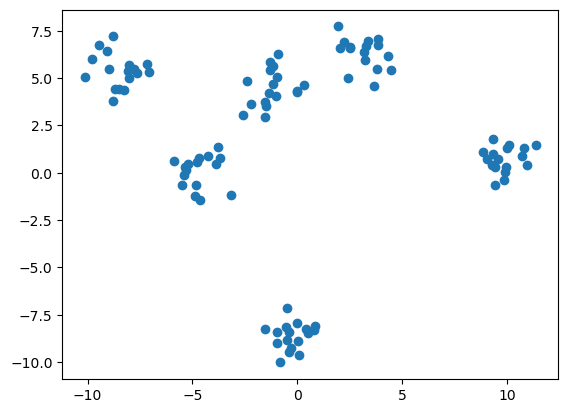

In [12]:
X_kmeans = pd.read_csv('data/a1-kmeans-toy-data.csv', header=None).to_numpy()

plt.figure()
plt.scatter(X_kmeans[:,0], X_kmeans[:,1])
plt.show()

### 2.1 Implementing K-Means++ (12 Points)

In the following, your task is to implement the K-Means clustering algorithm with K-Means++ initialization from scratch...well, almost from scratch. You can and should explore relevant methods provided by `numpy` or `sklearn`. The following subtasks will guide you step by step through the implementation, but you should also appreciate that K-Means is in it's core a very simple algorithm that can easily customized. We provide the skeleton code in the accompanying `.py` file as class `MyKMeans`.


#### 2.1 a) Initializing Centroids Based on K-Means++ (5 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Means++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next centroids based on probabilities depending on the distances between the data points and the existing centroids. You will implement the K-Means++ initialization in this task.

**Implement method `initialize_centroids()` to calculate the initial centroids based on K-Means++!** Note that we already imported the method `euclidean_distances()` for you, and you can use anything provided by `numpy` (*Hint:* Check out the method [`np.random.choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) as it might  come in very handy).

With the code cell below, you can test your implementation.

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

In [14]:
# Make the randomness "predictable" so the result is always the same
# (if you remove this line, the output will change for each run)
np.random.seed(0) 

my_kmeans = MyKMeans(n_clusters=3)
my_kmeans.initialize_centroids(X_kmeans)

print(my_kmeans.cluster_centers_)

[[-0.546 -8.162]
 [-7.801  5.454]
 [-4.856 -1.231]]


The expected output of the code cell above is:
    
```
[[-0.546 -8.162]
 [-7.801  5.454]
 [-4.856 -1.231]]

```

an array with $k=3$ rows -- one for each centroid (i.e., cluster center) -- and each row is an array with 2 coordinates since our dataset is just 2-dimensional. If you change the value for $k$, the shape of the array should change accordingly.

#### 2.1 b) Assigning Data Points to Clusters (4 Points)

In this step, each data point is assigned to its nearest centroid. Calculating distances and finding the smallest values is very easy with `sklearn` or `numpy`. (Hint: You may want to check [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html))

**Implement method `assign_clusters()` to assign each data point to its nearest centroid!** The method `assign_clusters()` needs to update `self.labels_` which is a 1-dimensional array of length $N$ (number of data points). Each element in `self.labels_` is a value ranging from $0$ to $(k-1)$ indicating to which cluster id a data point belongs to. For example, if `self.labels_ = [1, 0, 2, 2, 1]`, the first and the last data point belong to the same cluster. The second data point forms its own cluster; the third and forth data points form the third cluster (here $k=3$)

With the code cell below, you can test your implementation.

In [15]:
my_kmeans.assign_clusters(X_kmeans)

print(my_kmeans.labels_)

[1 0 1 2 0 1 2 0 2 1 1 1 2 1 2 0 0 0 0 0 1 1 2 2 2 1 2 0 2 2 2 1 2 1 1 2 1
 0 0 0 2 2 0 1 0 1 0 0 1 1 2 2 0 0 0 0 1 2 0 1 2 2 2 1 2 2 0 1 2 0 1 2 0 0
 1 0 1 1 0 2 2 0 1 0 2 0 1 1 1 2 2 0 1 0 2 1 0 1 0 1]


The expected output of the code cell above is:

```
[1 0 1 2 0 1 2 0 2 1 1 1 2 1 2 0 0 0 0 0 1 1 2 2 2 1 2 0 2 2 2 1 2 1 1 2 1
 0 0 0 2 2 0 1 0 1 0 0 1 1 2 2 0 0 0 0 1 2 0 1 2 2 2 1 2 2 0 1 2 0 1 2 0 0
 1 0 1 1 0 2 2 0 1 0 2 0 1 1 1 2 2 0 1 0 2 1 0 1 0 1]
```

Recall that we have 100 data points and set $k=3$. Hence, the length of the array is 100 and each element is either 0, 1, or 2, representing the cluster ids/labels. Note that the cluster id has no intrinsic meaning, it's only important that points in the same cluster have the same id/label. For example, the result `[1, 1, 0, 2, 1, 2]` would represent the same clustering as `[0, 0, 2, 1, 0, 1]`

#### 2.1 c) Updating the Centroids (3 Points)

After the assignment of the data points to clusters, all centroids need to be moved to the average of their respective clusters. Note that the centroids might not change because the assignment made no changes to the clusters and K-Means is done. We already handle this part in the given skeleton of the implementation.

**Implement `update_centroids()` to update the centroids (i.e., cluster center) with respect to the new cluster assignments!** As usual, we recommend making good use of `numpy`, or maybe `sklearn`.

With the code cell below, you can check your implementation.

In [16]:
my_kmeans.update_centroids(X_kmeans)

print(my_kmeans.cluster_centers_)

[[ 4.81  -3.952]
 [-3.665  5.821]
 [-2.019  2.251]]


The expected output of the code cell above is:

```
[[ 4.81  -3.952]
 [-3.665  5.821]
 [-2.019  2.251]]
```

Again, the output reflects our setting of $k=3$ and our 2-dimensional dataset.

#### Putting it all together (nothing for you to do here!)

With the initialization of the centroids, the assignment to cluster, and the update of the centroids in place, we have everything in place to perform K-Means++ over a dataset X given a choice for k. The method `fit()` below performs K-Means++ using your implementations of the methods `initialize_centroids()`, `assign_clusters()`, and `update_centroids()`. Note that we can exit the main loop once there is no more change in the cluster assignments; if all fails, the algorithm stops after `max_iter` iterations.

In [17]:
np.random.seed(5) 

my_kmeans = MyKMeans(n_clusters=3).fit(X_kmeans)

print('Number of iterations: {}\n'.format(my_kmeans.n_iter_))
print('Final cluster centers:\n{}\n'.format(my_kmeans.cluster_centers_))
print('Final cluster labels:\n{}\n'.format(my_kmeans.labels_))

Number of iterations: 5

Final cluster centers:
[[-4.798  3.381]
 [ 6.62   3.428]
 [-0.248 -8.621]]

Final cluster labels:
[0 2 0 0 1 1 1 2 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 1 2 2 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 0 0 2 1
 0 2 0 0 2 0 0 2 1 1 0 1 0 0 1 0 1 2 1 1 0 0 1 1 1 0]



For a final test, you can also compare your implementation with scitkit-learn's implementation [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Since we adopted the variable and method names from `KMeans` for `MyKMeans`, the code in the cell below is almost identical to the one above.

In [18]:
np.random.seed(5) 

sk_kmeans = KMeans(n_clusters=3, n_init=1).fit(X_kmeans)

print('Number of iterations: {}\n'.format(sk_kmeans.n_iter_))
print('Final cluster centers:\n{}\n'.format(sk_kmeans.cluster_centers_))
print('Final cluster labels:\n{}\n'.format(sk_kmeans.labels_))

Number of iterations: 9

Final cluster centers:
[[-4.798  3.381]
 [ 6.62   3.428]
 [-0.248 -8.621]]

Final cluster labels:
[0 2 0 0 1 1 1 2 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 1 2 2 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 0 0 2 1
 0 2 0 0 2 0 0 2 1 1 0 1 0 0 1 0 1 2 1 1 0 0 1 1 1 0]



**Important:** As the initialization of the centroids has a random component, the result of `KMeans` and `MyKMeans` might generally not be the same. Even if the final centroids are the same, the order might differ. And again, recall from above that, e.g., the labels `[1, 1, 0, 2, 1, 2]` would represent the same clustering as `[0, 0, 2, 1, 0, 1]`. Only with the chosen values for `np.random.seed()` we see the same results. Still, note that the number of iterations differ.

#### Visualization (nothing for you to do here) 

We provide you with auxiliary method `plot_kmeans_clustering()`; you can checkout `src.utils` to have a look at the code of the method. Feel free to go back and run `MyKMeans` or `KMeans` with different values for $k$ (visually we could already tell that $k=6$ is probably the best choice) and/or different random seeds (or not setting any seed at all). Just note that the given expected outcomes will no longer match for other values for $k$ and other seeds. But you can always visualize the result to assess whether the results look meaningful.

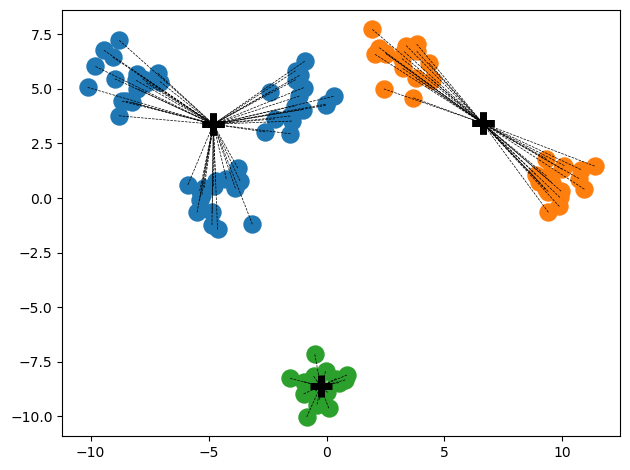

In [19]:
plot_kmeans_clustering(X_kmeans, my_kmeans.labels_, my_kmeans.cluster_centers_) # For your implementation
#plot_kmeans_clustering(X_kmeans, my_kmeans.labels_, sk_kmeans.cluster_centers_) # For sklearn's implementation

### 2.2 Questions about K-Means (6 Points)


#### 2.2 a) Understanging K-Means++ Initialization (6 Points)

The figure below shows six different datasets **A-F**, each containing 12 data points. The six datasets differ regarding their distribution of their data points.

<img src="images/a1-kmeans-datasets.png" />

Now let's assume that we run K-Means over all six datasets with the following settings
* Number of cluster: $k=3$
* K-Means++ initialization
* Data point 0 is forced to be the first centroid (this is the only change to the basic initilization)

Since the K-Means++ initialization is randomized -- apart from the first centroid here! -- each data point has the chance to be picked as the location for Centroid 2 and Centroids 3. However, if we run the K-Means initialization multiple times (say, 1,000 times) for each dataset, we can check which data points are more likely to get picked as the location for Centroids 2 and 3. 

The following six collections of plots visualize this; one for each dataset. Each row of three plots reflect the distribution of frequencies how of a data point was chosen as Centroid 1 (1st plot), as Centroid 2 (2nd plot), and as Centroid 3 (3rd plot). Of course, since we force data point 1 always to be the location of Centroid 1, the first plot in each row has only a bar for data point 1.

<img src="images/a1-kmeans-distribution-1.png" />
<img src="images/a1-kmeans-distribution-2.png" />
<img src="images/a1-kmeans-distribution-3.png" />
<img src="images/a1-kmeans-distribution-4.png" />
<img src="images/a1-kmeans-distribution-5.png" />
<img src="images/a1-kmeans-distribution-6.png" />

Find the correct combinations of datasets and frequency distributions -- that is, find for each dataset the most likely frequency distribution! Give a brief explanation for each decision! Complete the table below! (The last line shows an example.)

**Your Answer:**

| Dataset | Centroid Distribution | Brief Explanation |
| ---  | ---   | ---                  |
| **A**    | 2 | Once data point 1 is selected, then data point 7 is farthest from 1 and hence has highest probability, then data point 4 and data point 10 are farther from data point 1 and 7. This distribution is reflected in plot 2 |
| **B**    | 6 | For dataset B, data point 12 is farthest from data point 1 followed by data points 6, 11, 5, etc. Then, data points 3,4,9,10 seem to be the farthest from 1 and 12. This distribution is noticeable in plot 6.|
| **C**    | 1 | Data point 7 is seems to have higher probability of getting selected as second centroid in dataset C. For centroid 3, data points 3 and 11 seem to higher chance than the rest. This distribution can be seen in plot 1. |
| **D**    | 5 | In case of dataset D, data point 6 is farthest from data point 1, then data points 7 and 12 are farthest from data points 1 and 6. This particular distribution is observed in plot 5.|
| **E**    | 3 | In dataset E, data point 7 is farthest from data point 1 (opposite ends of diameter as dataset E looks like circle), followed closely by data points 6 and 8 (notice that probability of data points 6 and 8 being selected as centroid 2 is also quite high). For third centroid, data points 4 and 10 should have higher probability of being picked. This pattern is perceived in plot 3. |
| **F**    | 4 | Data point 12 is seems to be farthest from data point 1, followed by data points 11 and 6 (both seem to have equal distance). If data point 12 is selected as second centroid then data point 6 has highest probability of being picked as third centroid and if data point 6 is picked as second centroid then data point 12 has highest probability of being picked as third centroid. This exact distribution is seen in plot 4. |
| **<font color="red">X</font>**    | <font color="red">9</font> | <font color='red'>The dataset plot looks like a heart, and the bars also form a heart shape (please come up with better explanations :) !)</font> |

### 2.2 b) K-Means with Different Distance/Similarity metrics (2 Points)

In the lecture, we used the Euclidean Distance between data points in centroids to perform the Lloyd's algorithm. However, there are other distance metrics such as the [Manhatten Distance](https://en.wikipedia.org/wiki/Taxicab_geometry) or the [Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance). Can we use those or similar metrics instead of the Euclidean Distance? Give a **brief** justification for your answer!

**Your Answer**

Yes, we can use those metrics. Any metric that gives a notion of distance can be used to perform K-Means clustering. In fact, Manhatten Distance is Euclidean distance if data is one-dimensional, and Euclidean Distance is Minkowski Distance if data is two-dimensional. In general, for clustering we need representation of objects which can be coordinates in the space (ex: x,y), sets or vectors.